Physics 77 Presentation
Andre Palacios 
Giovanni Vizcarra
5.01.17

In [11]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt 
from pylab import *
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
style.use('fivethirtyeight')


In [12]:
radius_orbit = 1.66   # Radius between star and planet
central_mass  = 2.2    # mass of the  star
star_radius = .3
planet_mass = 0.00458047559    #mass of planet
gravitational_constant = 4*pi**2


velocity1 =sqrt(gravitational_constant*central_mass/radius_orbit) # Gives an approximate velocity based on the terms given
velocity2 =sqrt(gravitational_constant*planet_mass/radius_orbit) 

# Get initial position and speed.
print("For circular orbit of planet r = %g, and v = %g." % (radius_orbit,velocity1))
print("For circular orbit of star r = %g, and v = %g." % (star_radius,velocity2))


For circular orbit of planet r = 1.66, and v = 7.23331.
For circular orbit of star r = 0.3, and v = 0.330051.


In [14]:
"Everything is measured in AU,AU/yr, time is in earth years"
gravitational_constant = 4*pi**2


central_mass_str = input('Stars Mass: ') 
central_mass = float(central_mass_str) 
planet_mass_str = input('Planet Mass: ') 
planet_mass = float(planet_mass_str) 
x_initial_str = input('Planet initial radius (from center of mass): ') #allows users to post initial position of planet measured in AU
x_initial = float(x_initial_str) #plugs users input into code
velocity_y0_str = input('Planet initial tangential velocity: ') #allows user to post initial velocity of the planet
velocity_y0 = float(velocity_y0_str) #plugs users input into code

x_initial_star_str = input('Star initial radius (from center of mass: ')
x_initial_star = float(x_initial_star_str) #plugs users input into code
velocity_y0_star_str = input('Star initial tangential velocity: ')
velocity_y0_star = -float(velocity_y0_star_str) #plugs users input into code

## Set the initial conditions and also define needed array.
X0 = [ x_initial, 0, 0, velocity_y0]       # set initial state of the system for the planet
S0 = [ x_initial_star, 0, 0, velocity_y0_star]  # set initial state of the system for the star

initial_time = 0. #starts time at 0
final_time = 5
time_step = .01

time = arange(initial_time,final_time,time_step)   # create time array starting at initial_time,
                        # ending at tf with a spacing time step

## Define function to return f(X,t)
def f_func(state,time_1):
    f=zeros(4)
    f[0] = state[2]
    f[1] = state[3]
    r = sqrt(state[0]**2 + state[1]**2)
    f[2] = -(gravitational_constant*central_mass*state[0])/r**3
    f[3] = -(gravitational_constant*central_mass*state[1])/r**3
    return f
def star(state,time_1): 
    f=zeros(4)
    f[0] = state[2]
    f[1] = state[3]
    r = sqrt(state[0]**2 + state[1]**2)
    f[2] = -(gravitational_constant*planet_mass*state[0])/r**3
    f[3] = -(gravitational_constant*planet_mass*state[1])/r**3
    return f

## Solve the ODE with odeint
X = odeint(f_func,X0,time)
S = odeint(star,S0,time)

x_pos_star = S[:,0]   #separate components from odeint function
y_pos_star = S[:,1]  
velocity_x_star = S[:,2]
velocity_y_star= S[:,3]

x_pos = X[:,0]  
y_pos = X[:,1]  
velocity_x = X[:,2]
velocity_y= X[:,3]

## Plot the results
figure(1)
clf()

# Plot the orbit
figure(1)
subplot(2,1,1)
title("Orbit Planet 14 and B")
plot(x_pos_star,y_pos_star)
plot(x_pos,y_pos)
centerx = 0.
centery = 0.
plot(centerx,centery,'ko')
axis('equal')


#plotting radial velocity
#dot product with x axis unit vector, assuming line of sight to observer is in negative x direction
#figure out how to calculate actual line of sight vector so it's not just xvelocity
radial_velocity = velocity_x_star
figure(2)
title('Radial Velocity vs Time')
xlabel('Time')
ylabel('Radial Velocity')
plot(time, radial_velocity)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(x_pos,y_pos,c = 'r', marker = 'o')
ax.scatter(centerx,centery,c = 'b', marker = '*')
ax.scatter(x_pos_star,y_pos_star, marker = 'o')
plt.show()

KeyboardInterrupt: 

# Info (Plug in above)

Planet 14 And B:
central_mass  = 2.2 
planet_mass = 0.00458047559
radius_orbit = 1.66  
initial velocity (Planet) = 7.23331
star_radius = .3
initial velocity (Star) = 0.330051

Planet HD-81688:
central_mass = 2.1
planet_mass = 0.00257651752
radius_orbit = 1.62
initial velocity (Planet) = 7.15372
star_radius = .3
initial velocity (Star) = 0.250576

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 

fig = plt.figure()
ax1 = plt.axes(xlim=(-2, 2), ylim=(-2,2))
line, = ax1.plot([], [],lw=4 )
plt.xlabel('X-Position(Au)')
plt.ylabel('Y-Position(Au)')
plt.title('Planet 14 And B')


plotlays, plotcols = [2], ["red","black"]
lines = []
for index in range(2):
    lobj = ax1.plot([],[],markersize= 12,color=plotcols[index])[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

x1,y1 = [],[]
x2,y2 = [],[]


def animate(i):
    x = np.zeros(len(x_pos))
    y = np.zeros(len(x_pos))
    x = np.zeros(len(x_pos_star))
    y = np.zeros(len(x_pos_star))
    x = x_pos[i]
    y = y_pos[i]
    x1.append(x)
    y1.append(y)
    x = x_pos_star[i]
    y = y_pos_star[i]
    x2.append(x)
    y2.append(y)
    xlist = [x1, x2]
    ylist = [y1, y2]
    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=1000, blit=True)

anim.save('planet_14andB.mp4', fps=55, extra_args=['-pix_fmt', 'yuv420p'])
plt.show()

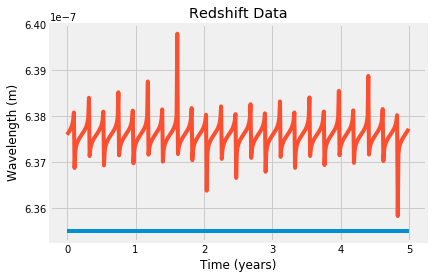

In [6]:
#Doppler shift: fs/fo = sqrt(1+B/1-B)
#CM of system and observer lined up along x-axis, so vmin and vmax
#(towards observer, approximated light rays near parallel since very far away) occur at x= 0 (in two-body ref frame)
#need to account for cm velocity away from observer too
#https://www.sfu.ca/colloquium/PDC_Top/astrobiology/discovering-exoplanets/calculating-exoplanet-properties.html

lamb_0 = 635.5e-9 #nm for hydrogen, converted to AU, plot in nm
G = 6.67408e-11


c = 3e+8 
B = (-.0033*c + radial_velocity*4743.72)/c  #conversion to m/s 
#NOTE: B is an array

def redshift(w_source, b):            #returns redshifted wavelength in m
    return  w_source*sqrt((1-b)/(1+b))
#print(sqrt((1+B)/(1-B)))

emitted = zeros(len(time)) + lamb_0
plot(time, emitted, label = 'Source wavelength')

     
xlabel('Time (years)')
ylabel('Wavelength (m)')
title('Redshift Data')
plot(time, redshift(lamb_0, B), label = 'Observed wavelength')



Period: 0.21739130434782608 Earth-years
Semi-major axis distance from Keplers third law: 0.455517197031151 AU


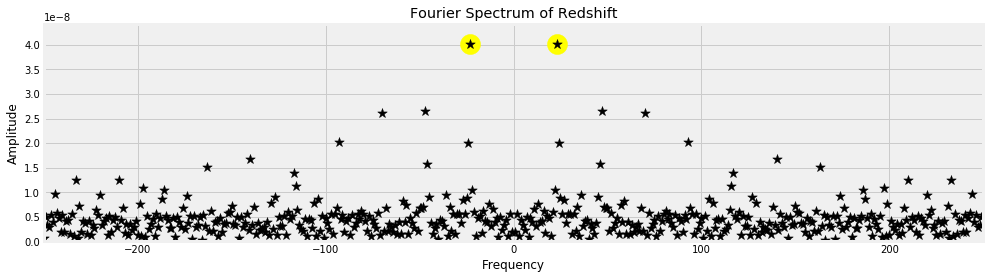

In [7]:
#Program finds period from doppler shift data via fourier spectrum
#then uses kepler's third law (T^2 = (4pi**2/G(M + m))a^3) to planet's semi-major axis
#a is orbital radius/ semi-major axis
import scipy.signal as sig
from scipy.fftpack import fft, ifft
#Due to recursion function, total time cannot exceed 5 years
def maximum(L):
    if len(L) == 1:
        return L[0]
    else:
        return max(L[0],maximum(L[1:]))   
    
N = len(time)
x = arange(-N//2, N//2)
f_redshift = abs(fft(redshift(lamb_0, B)))



peaksy = maximum(f_redshift[1:])
peaksx = zeros(2)
for i in arange(len(f_redshift - 1)):
    if f_redshift[i] == peaksy:
        peaksx[0] += x[N//2 + i]
        peaksx[1] += x[N//2 - i] 
        break
       
    
figure(figsize = (15, 4))
title('Fourier Spectrum of Redshift')
scatter(peaksx[0], peaksy, s = 400, color='yellow')
scatter(peaksx[1], peaksy, s = 400, color='yellow')

axis(xmin = -N//2, xmax = N//2, ymin = 0, ymax = 1.1*peaksy)
xlabel('Frequency')
ylabel('Amplitude')
grid(True)
scatter(x, np.fft.ifftshift(f_redshift), marker = '*', s = 100, color='black')

period = final_time/peaksx[0]
a_axis = (central_mass*period**2)**(1./3.) #kepler's third law
print('Period:', period, 'Earth-years' )
print('Semi-major axis distance from Keplers third law:', a_axis, 'AU')

#finding max frequencies positive max: A[(n-1)/2] negative max: A[(n+1)/2]